In [1]:
import sys 
sys.path.insert(0,'../')

In [2]:
from scripts.Deblender import Deblend
from scripts.utils import listdir_fullpath
from scripts.utils import norm, denorm, convert_to_linear_norm

import numpy as np
import os

import matplotlib.pyplot as plt

bands = [4,5,6,7,8,9]

2022-01-17 12:18:42.417336: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /pbs/throng/lsst/users/bbiswas/miniconda3/envs/fvae_miniconda/lib/:
2022-01-17 12:18:42.417401: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
######## List of data samples
images_dir = '/sps/lsst/users/barcelin/data/isolated_galaxies/' + '27.5/centered/'
list_of_samples = [x for x in listdir_fullpath(os.path.join(images_dir,'training')) if x.endswith('.npy')]
list_of_samples_val = [x for x in listdir_fullpath(os.path.join(images_dir,'validation')) if x.endswith('.npy')]

images = np.load(list_of_samples_val[0])[:200]


In [4]:
images_noisy = convert_to_linear_norm(images[:, 1, 4:])
images_noisy = np.transpose(images_noisy, axes=(0, 2, 3, 1))

images_isolated = convert_to_linear_norm(images[:, 0, 4:])
images_isolated = np.transpose(images_isolated, axes=(0, 2, 3, 1))

In [5]:
# randomly choose the 
num_images_to_denoise = 2
shuffled_indices = np.arange(200)
np.random.shuffle(shuffled_indices)

print(shuffled_indices)

[156 175  52 145   6 116 164 144  94  60  34 192  23 126 132  59  12 120
 161  17 174  96  49  18  51  76 180  20  15   1  39   2 176  53  90 185
  69 155 149 103  95  57   0 143 136 172  86 100 158 184  56  36  43  10
 182 178 127 170  22 104 150   5 160   9 167  80 122  13  79 189  30 110
 124 166 102  24  77 131  81  74   7  50  91  98  46 193  45 121 142  26
  31  41 165  54 113 111 152 196 108  64   8  29  99  11 137  75 140 186
  65  38 129  37 190 198  61 141  82  72  55 183 159 123 179  85 163  21
 112 151 130  44 153  83 171  14 195  27  42  67  16 194 125 148 115  71
  48 119 187 138 114  47 117 177  40  28  33 157  89  62 135 146  93   3
 169 173  63 147  66 168 154  68  97 128 101  25 197  88  87 106  92 181
 118 191  32  70  84 134   4 199 107 105 188  58 139  73  78 162 133 109
  35  19]


image number: 0


2022-01-17 12:19:12.285609: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /pbs/throng/lsst/users/bbiswas/miniconda3/envs/fvae_miniconda/lib/:
2022-01-17 12:19:12.285666: W tensorflow/stream_executor/cuda/cuda_driver.cc:312] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-17 12:19:12.285706: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jns-bbiswas.cc.in2p3.fr): /proc/driver/nvidia/version does not exist
2022-01-17 12:19:12.286210: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-0

Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Do not pass `graph_parents`.  They will  no longer be used.
Instructions for updating:
`batch_shape` and `event_shape` args are deprecated. Please use `tfd.Sample`, `tfd.Independent`, and broadcasted parameters of the base distribution instead. For example, replace `tfd.TransformedDistribution(tfd.Normal(0., 1.), tfb.Exp(), batch_shape=[2, 3], event_shape=[4])` with `tfd.TransformedDistrbution(tfd.Sample(tfd.Normal(tf.zeros([2, 3]), 1.),sample_shape=[4]), tfb.Exp())` or `tfd.TransformedDistribution(tfd.Independent(tfd.Normal(tf.zeros([2, 3, 4]), 1.), reinterpreted_batch_ndims=1), tfb.Exp())`.
Instructions for updating:
`batch_shape` and `event_shape` args are deprecated. Please use `tfd.Sample`, `tfd.Independent`, and broadcasted parameters of the base distribution instead. For example, replace `tfd.TransformedDistribution(tfd.Normal(0., 1.), tfb.Exp(), batch_shape=[2, 3], event_shape=[4])

2022-01-17 12:19:16.100329: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.



Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f0690239690> and <tensorflow.python.keras.engine.base_layer.TensorFlowOpLayer object at 0x7f04fc13ded0>).
(64, 64, 6)


2022-01-17 12:19:23.639581: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 33030144 exceeds 10% of free system memory.
2022-01-17 12:19:24.588904: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 33030144 exceeds 10% of free system memory.
2022-01-17 12:19:24.855536: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 33030144 exceeds 10% of free system memory.
2022-01-17 12:19:25.120810: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 33030144 exceeds 10% of free system memory.
2022-01-17 12:19:25.385964: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 33030144 exceeds 10% of free system memory.


image number: 1

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f04adf62ed0> and <tensorflow.python.keras.engine.base_layer.TensorFlowOpLayer object at 0x7f04adc617d0>).
(64, 64, 6)


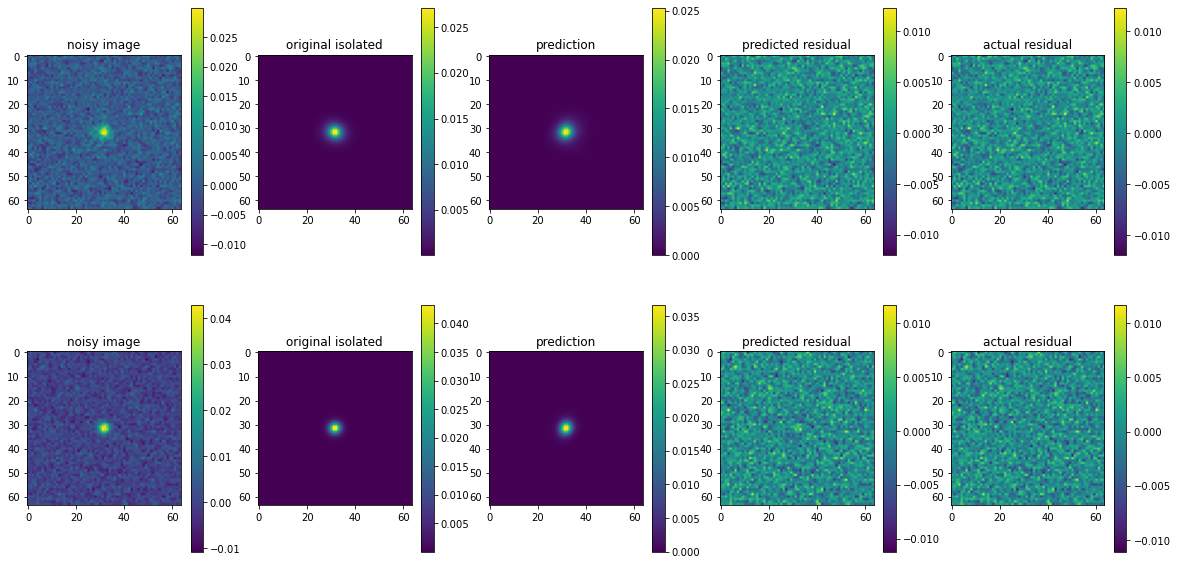

In [6]:
# iterate and deblend
fig, ax = plt.subplots(num_images_to_denoise, 5, figsize=(20,5*num_images_to_denoise))
for i in range(num_images_to_denoise):
    print("image number: " + str(i))
    image_index = shuffled_indices[i]

    deblender = Deblend(images_noisy[image_index], channel_last=True)
    residual = images_noisy[image_index] - deblender.components

    im1 = ax[i, 0].imshow(images_noisy[image_index, :, :, 2])
    fig.colorbar(im1, ax=ax[i, 0])
    ax[i, 0].set_title("noisy image")

    im2 = ax[i, 1].imshow(images_isolated[image_index, :, :, 2])
    fig.colorbar(im2, ax=ax[i, 1])
    ax[i, 1].set_title("original isolated")

    im3 = ax[i, 2].imshow(deblender.components[: ,:, 2])
    fig.colorbar(im3, ax=ax[i, 2])
    ax[i, 2].set_title("prediction")

    im4 = ax[i, 3].imshow(residual[: ,:, 2])
    fig.colorbar(im4, ax=ax[i, 3])
    ax[i, 3].set_title("predicted residual")

    im5 = ax[i, 4].imshow(images_noisy[image_index, : ,:, 2] - images_isolated[image_index, :, :, 2])
    fig.colorbar(im5, ax=ax[i, 4])
    ax[i, 4].set_title("actual residual")